In [84]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Opening the file

In [85]:
#Merge all csv files into one with terminal: cat *.csv >merged.csv

#Another possibility is to load the files into dataframe one by one
#path =r'/Users/Sergey/Documents/' # use your path
#all= glob.glob(path + "/*.csv")
#df = pd.DataFrame()
#list = []
#for file in files:
#    df = pd.read_csv(file,sep='\||\&SDF\*', quotechar="'",header=1, engine='python',error_bad_lines=False)
#    list.append(df)
#frame = pd.concat(list)

In [86]:
#Load the merged file into df
df = pd.read_csv('merged.csv', sep='\||\&SDF\*', quotechar="'",engine='python',error_bad_lines=False)
#We found several errors, due to the incorrect rows. For now we can skip these lines, 
#later we can check whether they will make any reasonable difference to the analysis.

Skipping line 267601: Expected 5 fields in line 267601, saw 8. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 267701: Expected 5 fields in line 267701, saw 7. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 290390: Expected 5 fields in line 290390, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 332548: Expected 5 fields in line 332548, saw 6. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 405250: Expected 5 fields in line 405250, saw 7. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 405288: Expected 5 fields in line 405288, saw 8. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 475339: Expected 5 fields in line 475339, saw 7. Error could possibly be d

In [87]:
#Let's check the content of our dataframe
print(df.head(3))
print(df.describe())

  "RecordID" "SubscriberID" "BillingMonth" "BillingRate" "Region"
0          1     0000000001              1       $233.94   "West"
1          2     0000000002              1       $214.14   "West"
2          3     0000000003              1       $208.74   "East"
        "RecordID" "SubscriberID" "BillingMonth" "BillingRate" "Region"
count      1236376        1236375        1236370       1236369  1236366
unique     1235821         103894             18           126        5
top     "RecordID"     0000065456              1       $221.34   "West"
freq             9             13         103555         20665   495863


In [88]:
#check that we have all the rows
len(df)

1236376

# Feature preparation

In [89]:
#Remove quotes
df.columns = df.columns.str.strip('"')
#Remove dollar sign
df['BillingRate'] = df['BillingRate'].str.replace('$', '')
#Convert columns to numeric format
#Define numeric columns
columns=['RecordID','BillingMonth','BillingRate']
df[columns] = df[columns].convert_objects(convert_numeric=True)
#Check the df again
df.head(3)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,RecordID,SubscriberID,BillingMonth,BillingRate,Region
0,1.0,0000000001,1.0,233.94,"""West"""
1,2.0,0000000002,1.0,214.14,"""West"""
2,3.0,0000000003,1.0,208.74,"""East"""


In [90]:
#Change column names
df = df.rename(columns={'RecordID' : 'RID',
                            'SubscriberID' : 'SID',
                            'BillingMonth' : 'Mo',
                            'BillingRate' : 'Ra',
                            'Region' : 'Reg',
                            })

In [91]:
#Remove NAN values
df = df.dropna(how='any',axis=0)
#Check that there are no rows with NAN
print(df.isnull().sum())
inds = pd.isnull(df).any(1).nonzero()[0]
#Locate if necessary
#print (pd.isnull(df).any(1).nonzero()[0])
#print(df.loc[[1056]])

RID    0
SID    0
Mo     0
Ra     0
Reg    0
dtype: int64


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236355 entries, 0 to 1236375
Data columns (total 5 columns):
RID    1236355 non-null float64
SID    1236355 non-null object
Mo     1236355 non-null float64
Ra     1236355 non-null float64
Reg    1236355 non-null object
dtypes: float64(3), object(2)
memory usage: 56.6+ MB


In [93]:
#Convert RecID and BillingMonth to integer 
df['RID'] = df['RID'].astype(int)
df['Mo'] = df['Mo'].astype(int)

# Feature Engineering

Mo
1     103508
2     103337
3     103394
4     103449
5     103300
6     103276
7     102836
8     102741
9     102674
10    102576
11    102378
12    102343
Name: SID, dtype: int64


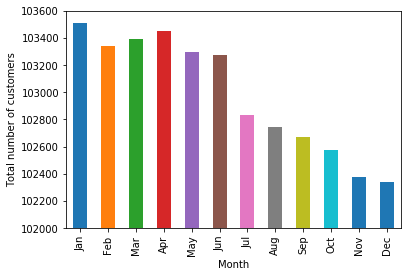

In [94]:
#Let's count total number of customers for every month
#First group the dataframe by Mo and find number of unique SID
cm=df.groupby('Mo')['SID'].nunique()

#We can therefore determine number of customers of the company for each month
print (cm)
fig = plt.figure()
ax=cm.plot.bar()
plt.xlabel("Month")
plt.ylabel('Total number of customers')
plt.ylim(102000,103600)
ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])

plt.show
plt.savefig('all_clients.pdf', bbox_inches='tight', format='pdf')

105.909090909
Mo
1       NaN
2     171.0
3     -57.0
4     -55.0
5     149.0
6      24.0
7     440.0
8      95.0
9      67.0
10     98.0
11    198.0
12     35.0
Name: SID, dtype: float64


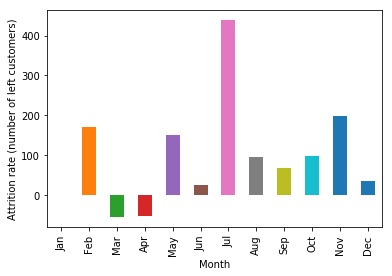

In [95]:
#Take differences between total number of customers for different months will give us the number of retaining customers. 
att=cm.diff(periods=1)*(-1)
print (att.mean())
#We can plot full number of subscribers left at each month
print (att)
ax=att.plot.bar()
plt.xlabel("Month")
plt.ylabel('Attrition rate (number of left customers)')
ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])
plt.show
plt.savefig('attrition.pdf', bbox_inches='tight', format='pdf')

# Customer attrition per region

In [96]:
#Let us split customer regions
df_e=df[df.Reg == '"East"' ]
df_w=df[df.Reg == '"West"' ]
df_n=df[df.Reg == '"North"' ]
df_s=df[df.Reg == '"South"' ]

#Also change the name of the SubscriberID for each region
df_e = df_e.rename(columns={'SID' : 'SID_e',
                       })
df_w = df_w.rename(columns={'SID' : 'SID_w',
                       })
df_n = df_n.rename(columns={'SID' : 'SID_n',
                       })
df_s = df_s.rename(columns={'SID' : 'SID_s',
                       })

In [97]:
#Group customers by SID for different regions
cm_w=df_w.groupby('Mo')['SID_w'].nunique()
cm_e=df_e.groupby('Mo')['SID_e'].nunique()
cm_n=df_n.groupby('Mo')['SID_n'].nunique()
cm_s=df_s.groupby('Mo')['SID_s'].nunique()

In [98]:
#Calculate attrition again
att_w=cm_w.diff(periods=1)*-1
att_e=cm_e.diff(periods=1)*-1
att_s=cm_n.diff(periods=1)*-1
att_n=cm_s.diff(periods=1)*-1

In [99]:
#Combine the data for all regions
df_cm=pd.concat([cm_n, cm_s, cm_w, cm_e], axis=1)
df_att=pd.concat([att_n, att_s, att_w, att_e], axis=1)
#sns.factorplot(x='Mo', y='rate', hue='Reg', data=df, kind='bar')

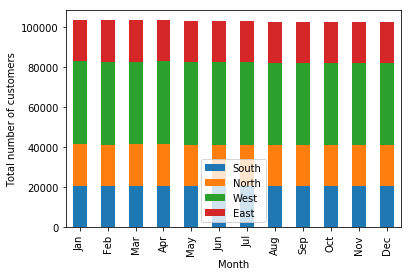

In [182]:
#Let'us plot the customer number
ax=df_cm.plot(kind='bar', stacked=True)
plt.legend(['South', 'North', 'West', 'East'])
plt.xlabel("Month")
plt.ylabel('Total number of customers')
plt.show
ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])
plt.savefig('all_clients_region.pdf', bbox_inches='tight', format='pdf')

    SID_s  SID_n  SID_w  SID_e
Mo                            
1     NaN    NaN    NaN    NaN
2    36.0   33.0   73.0   29.0
3    -4.0  -13.0  -14.0  -26.0
4    -6.0   -8.0  -28.0  -13.0
5    39.0   22.0   58.0   30.0
6    11.0    8.0   -2.0    7.0
7    80.0   93.0  185.0   82.0
8    28.0   16.0   34.0   17.0
9    16.0   13.0   32.0    6.0
10   15.0   23.0   39.0   21.0
11   38.0   50.0   78.0   32.0
12    8.0    1.0   22.0    3.0


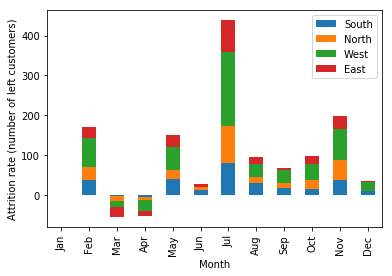

In [181]:
#Let'us plot the attrition rate
ax=df_att.plot(kind='bar', stacked=True)
plt.legend(['South', 'North', 'West', 'East'])
plt.xlabel("Month")
plt.ylabel('Attrition rate (number of left customers)')
ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])
plt.show
plt.savefig('attrition_region.pdf', bbox_inches='tight', format='pdf')
print (df_att)

# Distribution of customers

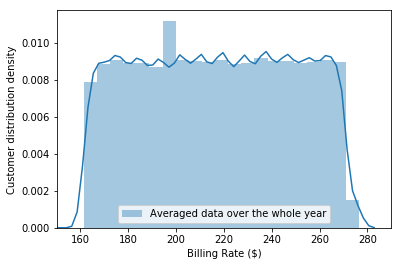

In [102]:
#We can also see how the price and distirbution of customers by price changed over the calendar year.

#Check distribution difference with region
#sns.distplot(df_w['Ra'], hist=True, rug=False)
#sns.distplot(df_e['Ra'], hist=True, rug=False)
#sns.distplot(df_n['Ra'], hist=True, rug=False)
#sns.distplot(df_s['Ra'], hist=True, rug=False)

#Check distribution difference with month
#for i in range(1,12):
#    df_mon=df_e[df_e.Mo == i]
#    dp=sns.distplot(df_mon['Ra'], hist=True, rug=False)
#    plt.xlim(150, 290)
#    plt.ylim(0, 0.015)
#    print (i)
#    plt.show()

#df_jul=df_w[df_w.Mo == 7]
#df_aug=df_w[df_w.Mo == 8]
#sns.distplot(df_jul['Ra'], hist=True, rug=False)
#sns.distplot(df_aug['Ra'], hist=True, rug=False)
dp=sns.distplot(df['Ra'], hist=True, rug=False)
plt.xlim(150, 290)
plt.xlabel("Billing Rate ($)")
plt.savefig('distr0.pdf', bbox_inches='tight', format='pdf')
plt.ylabel("Customer distribution density")
#plt.legend(['July', 'August'],loc=8)
plt.legend(['Averaged data over the whole year'],loc=8)

# Averaged price changes over the year

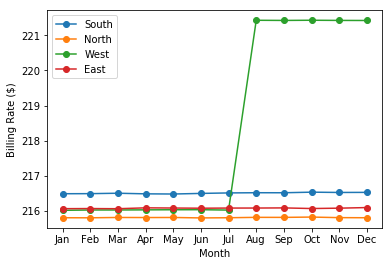

In [178]:
#We can also check how the averaged price changes over the year
#avr = df.groupby('Mo').mean()
avrn = df_n.groupby('Mo').mean()
avrs = df_s.groupby('Mo').mean()
avre = df_e.groupby('Mo').mean()
avrw = df_w.groupby('Mo').mean()

fig, ax = plt.subplots()
x=np.linspace(1,12,12)
#ax.plot(avr['Ra'],'-o')
ax.plot(x,avrs['Ra'],'-o')
ax.plot(avrn['Ra'],'-o')
ax.plot(avrw['Ra'],'-o')
ax.plot(avre['Ra'],'-o')
plt.xticks(np.arange(1,13))
ax.legend(['South', 'North', 'West', 'East'])
ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])
plt.ylabel("Billing Rate ($)")
plt.xlabel("Month")
#labels = [item.get_number() for item in ax.get_xticklabels()]
#print (labels)
plt.savefig('av1.pdf', bbox_inches='tight', format='pdf')
plt.show()
#print ([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])


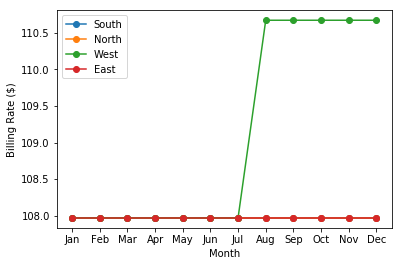

In [179]:
#Do the same for median value
#maxa = df[df['Ra'] > 100].groupby('Mo').max()
maxn = df_n[df_n['Ra'] > 100].groupby('Mo').max()
maxs = df_s[df_s['Ra'] > 100].groupby('Mo').max()
maxe = df_e[df_e['Ra'] > 100].groupby('Mo').max()
maxw = df_w[df_w['Ra'] > 100].groupby('Mo').max()

#mina = df[df['Ra'] > 100].groupby('Mo').min()
minn=df_n[df_n['Ra'] > 100].groupby('Mo').min()
mins=df_s[df_s['Ra'] > 100].groupby('Mo').min()
mine=df_e[df_e['Ra'] > 100].groupby('Mo').min()
minw=df_w[df_w['Ra'] > 100].groupby('Mo').min()

fig, ax = plt.subplots()
#ax.plot(maxa['Ra']-mina['Ra'],'-o')
ax.plot(maxn['Ra']-minn['Ra'],'-o')
ax.plot(maxs['Ra']-mins['Ra'],'-o')
ax.plot(maxw['Ra']-minw['Ra'],'-o')
ax.plot(maxe['Ra']-mine['Ra'],'-o')
plt.xticks(np.arange(1,13))
plt.legend(['South', 'North', 'West', 'East'])
ax.set_xticklabels([datetime(2017,_,1).strftime('%b') for _ in range(1,13)])
plt.ylabel("Billing Rate ($)")
plt.xlabel("Month")
plt.savefig('maxmin.pdf', bbox_inches='tight', format='pdf')
plt.show()


# Analysis of retained customers

In [111]:
#Finally we can find out more information about left customers in July
#Convert SubID to numeric for simplicity
df['SID'] = df['SID'].convert_objects(convert_numeric=True)


df_r=pd.DataFrame()
z=0
for i in range(1,103600):
    if len(df[df.SID == i]) == 6:
        print (i)
        z=z+1
        df_r=pd.concat((df_r,df[df.SID == i]), axis=0)
#df_east=df[df.Reg == '"West"' ]
#df_jan=df_west[df_west.Mo == 6]
#print(df_jan_west)
#sns.distplot(df_jan['Ra']);

#for i in range
#len(df[(df['Mo']==5)])
#sns.distplot(df['Ra']);
#df[df.SID == 21210]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


212
337
643
1111
1131
1171
1395
1491
1709
2318
2481
3577
4133
4424
4527
4530
4631
4754
4771
5039
5148
5856
6156
6201
6207
6538
7244
7253
7473
7527
7782
7935
8023
8254
8364
8389
9001
9448
9646
9656
9741
10124
10329
10423
10436
10529
10534
10732
10772
10784
11098
11144
11545
11633
11773
11839
11851
11880
12438
12761
13593
13917
14025
14741
15045
15168
15349
15566
15626
15747
15994
16547
16658
16907
17704
17760
17903
17941
17986
18009
18218
18554
18683
19044
19085
19848
19878
20078
20124
20501
20507
20850
20893
20991
20994
21034
21090
21237
21866
22314
22558
22668
23211
23395
23834
23923
24037
24167
24431
24474
24687
25064
25153
25359
25521
25807
26253
26989
27221
27282
27315
27378
27400
27405
27432
27725
27843
27983
28097
28408
28429
28990
29322
29543
29713
29722
29988
30239
30688
30819
30823
30907
30919
31999
32137
32196
32319
32322
32541
32708
33116
33284
33405
33823
33838
33930
34015
34273
35257
35331
35426
35469
35714
35765
35812
36248
36768
37085
37430
37820
37824
38014
38300
38531


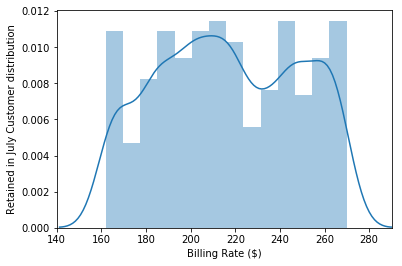

In [890]:
#Plot the distribution of retained customers by Billing Rate
dp=sns.distplot(df_r['Ra'], hist=True, rug=False)
plt.xlim(140, 290)
plt.xlabel("Billing Rate ($)")
plt.ylabel("Retained in July Customer distribution")
plt.savefig('ret.pdf', bbox_inches='tight', format='pdf')

Mo
Q1      NaN
Q2    111.0
Q3    682.0
Q4    274.0
Name: SID, dtype: float64


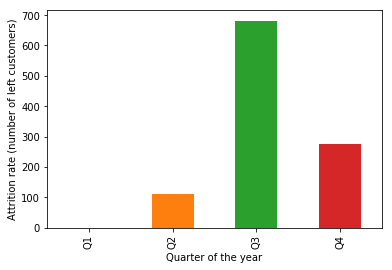

In [183]:
#We can also merge months into the quarters of the year: Q1, Q2, Q3, Q4
def simplify_months(df):
    bins = (0, 3, 6, 9, 12)
    group_names = ['Q1', 'Q2', 'Q3', 'Q4']
    categories = pd.cut(df.Mo, bins, labels=group_names)
    df_q.Mo = categories
    return df
df_q=df
df_q=simplify_months(df)

cm_q=df_q.groupby('Mo')['SID'].nunique()
att_q=cm_q.diff(periods=1)*(-1)
att_q.dropna(axis=0, how='any')
print (att_q)
att_q.plot.bar()
plt.xlabel("Quarter of the year")
plt.ylabel('Attrition rate (number of left customers)')
plt.show
plt.savefig('quarters.pdf', bbox_inches='tight', format='pdf')
